In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

from research_utils.database.database import Database

## Network Concentration as a Function of Size

In [2]:
database = Database()

In [3]:
sql = """
SELECT a.organization, a.package, gini_coefficient,
	   avg_clustering, avg_min_path, ks_pval,
        stakeholder_count, issue_count
FROM (
	SELECT organization, package, gini_coefficient,
           avg_clustering, avg_min_path, ks_pval
	FROM open_source.stakeholder_networks
) a
INNER JOIN (
	SELECT organization, package, 
	COUNT(DISTINCT user_id) AS stakeholder_count,
	COUNT(DISTINCT issue_number) AS issue_count
	FROM open_source.issue_comments
	GROUP BY organization, package
) b
ON (a.package = b.package
AND a.organization = b.organization)
"""

In [4]:
df = pd.read_sql(sql, database.connection)

2019-07-11 20:41:16,782 [867] WARNING  py.warnings: /home/matt/venv/phd/lib/python3.5/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)

2019-07-11 20:41:16,784 [867] WARNING  py.warnings: /home/matt/venv/phd/lib/python3.5/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)



(0, 0.7)

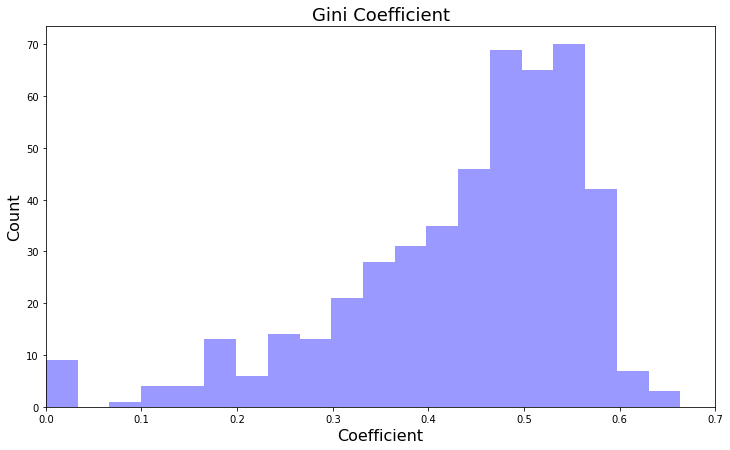

In [5]:
plt.figure(figsize=(12, 7))
sns.distplot(df['gini_coefficient'], kde=False, color='blue', bins=20)
plt.title('Gini Coefficient', fontsize=18)
plt.xlabel('Coefficient', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xlim([0,.7])

Text(0, 0.5, 'Gini Coefficient')

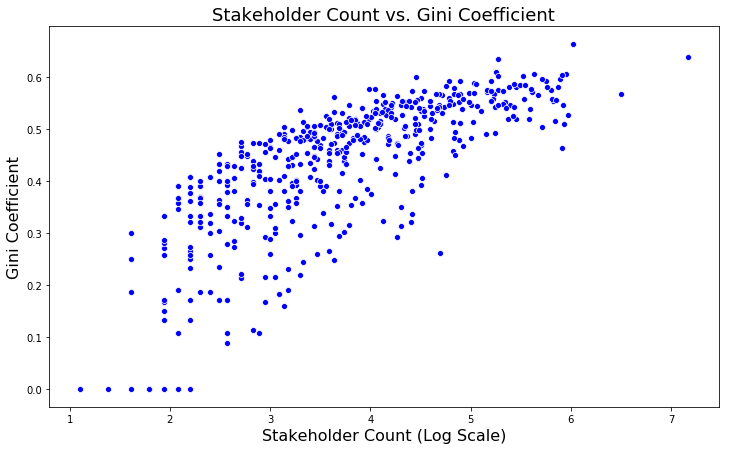

In [6]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x=np.log(df['stakeholder_count']), y=df['gini_coefficient'], color='blue')
plt.title('Stakeholder Count vs. Gini Coefficient', fontsize=18)
plt.xlabel('Stakeholder Count (Log Scale)', fontsize=16)
plt.ylabel('Gini Coefficient', fontsize=16)

In [7]:
df2 = df.dropna()
output = stats.linregress(df2['gini_coefficient'], np.log(df2['stakeholder_count']))
output

LinregressResult(slope=6.37732114816913, intercept=0.9490722206374205, rvalue=0.7473797485090745, pvalue=4.2675306008292855e-87, stderr=0.259034097742251)

Text(0, 0.5, 'Gini Coefficient')

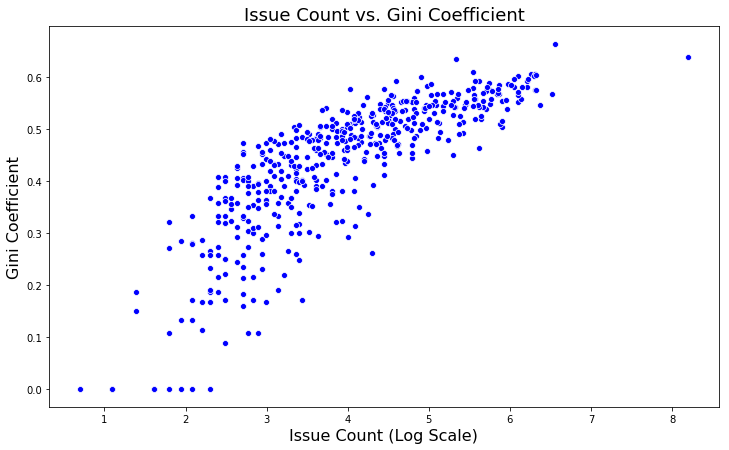

In [8]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x=np.log(df['issue_count']), y=df['gini_coefficient'], color='blue')
plt.title('Issue Count vs. Gini Coefficient', fontsize=18)
plt.xlabel('Issue Count (Log Scale)', fontsize=16)
plt.ylabel('Gini Coefficient', fontsize=16)

Text(0, 0.5, 'Cluster Coefficient')

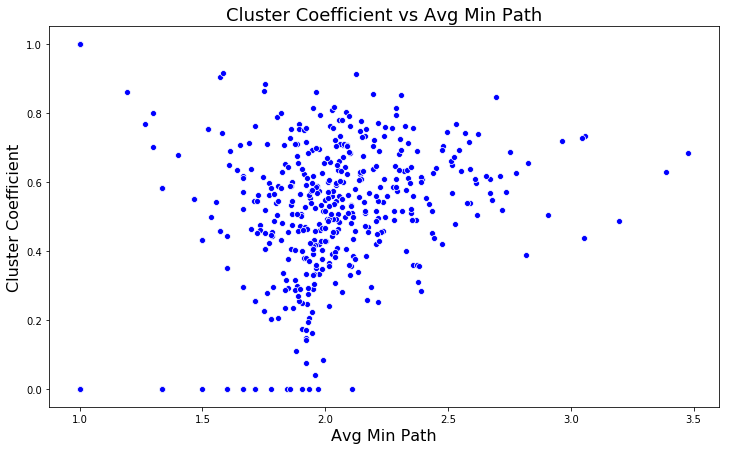

In [16]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x=df['avg_min_path'], y=df['avg_clustering'], color='blue')
plt.title('Cluster Coefficient vs Avg Min Path', fontsize=18)
plt.xlabel('Avg Min Path', fontsize=16)
plt.ylabel('Cluster Coefficient', fontsize=16)

Text(0, 0.5, 'Avg Shortest Path')

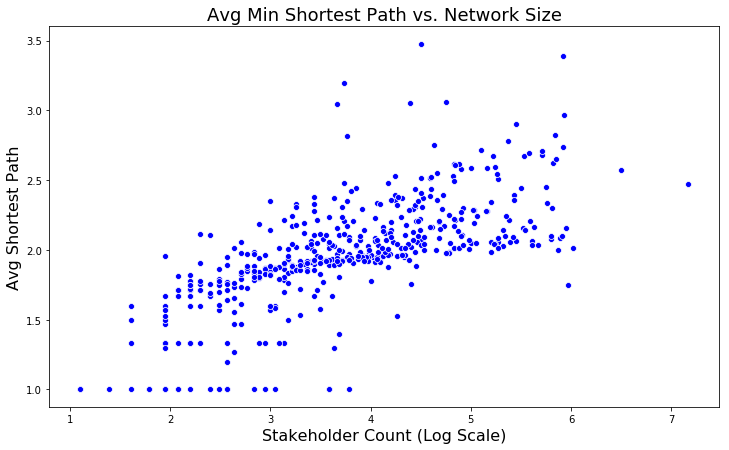

In [10]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x=np.log(df['stakeholder_count']), y=df['avg_min_path'], color='blue')
plt.title('Avg Min Shortest Path vs. Network Size', fontsize=18)
plt.xlabel('Stakeholder Count (Log Scale)', fontsize=16)
plt.ylabel('Avg Shortest Path', fontsize=16)

In [11]:
df2 = df.dropna()
output = stats.linregress(df2['avg_min_path'], np.log(df2['stakeholder_count']))
output

LinregressResult(slope=1.9400865170288817, intercept=-0.09766327254834994, rvalue=0.6893943349529206, pvalue=4.4444078132781126e-69, stderr=0.09314420353238867)